In [1]:
suppressMessages(library(data.table))
suppressMessages(library(ggplot2))
suppressMessages(library(matrixStats))
suppressMessages(library(ggsci))
suppressMessages(library(magrittr))
suppressMessages(library(ggrepel))
suppressMessages(library(dplyr))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(ggpubr))
suppressMessages(library(circlize))
suppressMessages(library(hrbrthemes))
options(warn=-1) # use options(warn=0) To turn warnings back on
options(dplyr.summarise.inform = FALSE)

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/Figures")

In [3]:
#load data
load("../data/data_SupFig05.RData")

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



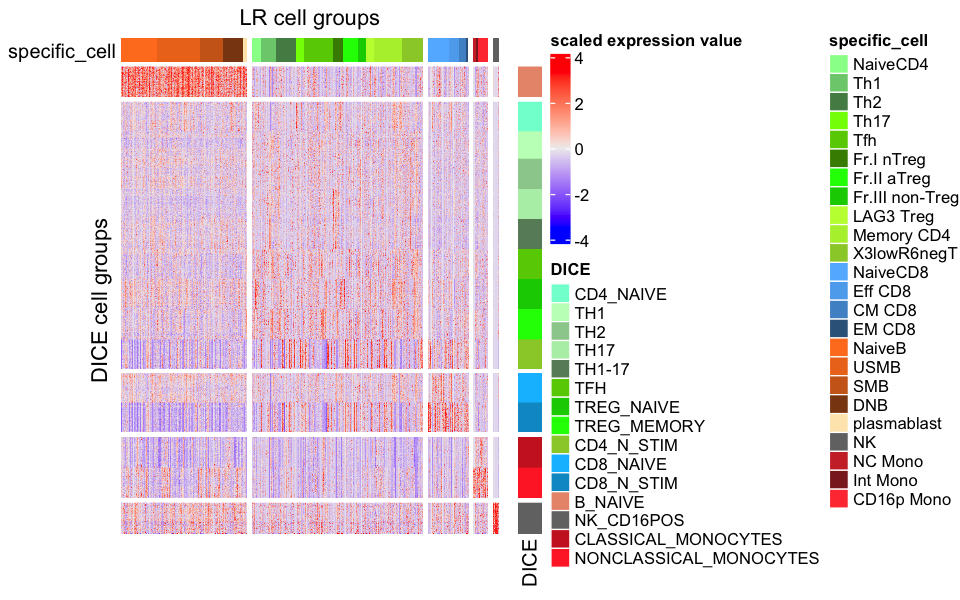

In [6]:
options(repr.plot.width=8, repr.plot.height=5)
ha = HeatmapAnnotation(specific_cell = factor(col_lab_dice$specific_cell_LR, levels = intersect(cell_ord2,col_lab_dice$specific_cell_LR)),
                       col = list(specific_cell = c("NaiveB" = "chocolate1","USMB" = "chocolate2","SMB" = "chocolate3","DNB" = "chocolate4",
                                                    "NaiveCD4" = "palegreen","Th1" = "palegreen3","Th2" = "palegreen4","Th17" = "chartreuse","Tfh" = "chartreuse3","Fr.I nTreg" = "chartreuse4","Fr.II aTreg" = "green1","Fr.III non-Treg" = "green3","LAG3 Treg" = "olivedrab1","Memory CD4" = "olivedrab2","X3lowR6negT" = "olivedrab3",
                                                    "NaiveCD8" = "steelblue1","Eff CD8" = "steelblue2","CM CD8" = "steelblue3","EM CD8" = "steelblue4",
                                                    "plasmablast" = "wheat1","pDC" = "wheat2","mDC" = "wheat3",
                                                    "NK" = "grey45",
                                                    "CD16p Mono" = "brown1","CL Mono" = "brown2","NC Mono" = "brown3","Int Mono" = "brown4",
                                                    "PBMC" = "black",
                                                    "Neu" = "darkmagenta")),
                       annotation_name_side = "left")
ht_list = 
  Heatmap(scale(t(dice)), 
          top_annotation = ha, 
          cluster_columns = FALSE, show_column_names = FALSE, show_column_dend = FALSE,
          cluster_rows = FALSE, show_row_names = FALSE, show_row_dend = FALSE, 
          row_names_gp = gpar(fontsize = 10, axis = 45),
          row_split = 
            IID_d$cell %>%
            as.data.frame() %>%
            magrittr::set_colnames("cell") %>%
            dplyr::mutate(group = dplyr::case_when(
              cell == "B_NAIVE" ~ "B",
              cell == "CD4_NAIVE" ~ "CD4T",cell == "CD4_N_STIM" ~ "CD4T",cell == "TH1" ~ "CD4T",cell == "TH17" ~ "CD4T",cell == "TH2" ~ "CD4T",cell == "TH1-17" ~ "CD4T",cell == "TFH" ~ "CD4T",cell == "TREG_MEMORY" ~ "CD4T",cell == "TREG_NAIVE" ~ "CD4T",
              cell == "CD8_NAIVE" ~ "CD8T",cell == "CD8_N_STIM" ~ "CD8T",
              cell == "NONCLASSICAL_MONOCYTES" ~ "Mono",cell == "CLASSICAL_MONOCYTES" ~ "Mono",
              cell == "NK_CD16POS" ~ "NK"
            )) %>%
            .$group
          , 
          row_title = "DICE cell groups",
          column_split = col_lab_dice$specific_cell_LR %>%
            as.data.frame() %>%
            magrittr::set_colnames("cell") %>%
            dplyr::mutate(group = dplyr::case_when(
              cell == "NaiveB" ~ "B",cell == "USMB" ~ "B",cell == "SMB" ~ "B",cell == "DNB" ~ "B",cell == "plasmablast" ~ "B",
              cell == "NaiveCD4" ~ "CD4T",cell == "Th1" ~ "CD4T",cell == "Th2" ~ "CD4T",cell == "Th17" ~ "CD4T",cell == "Tfh" ~ "CD4T",cell == "Fr.I nTreg" ~ "CD4T",cell == "Fr.II aTreg" ~ "CD4T",cell == "Fr.III non-Treg" ~ "CD4T",cell == "LAG3 Treg" ~ "CD4T",cell == "Memory CD4" ~ "CD4T",cell == "X3lowR6negT" ~ "CD4T",
              cell == "NaiveCD8" ~ "CD8T",cell == "Eff CD8" ~ "CD8T",cell == "CM CD8" ~ "CD8T",cell == "EM CD8" ~ "CD8T",
              cell == "CD16p Mono" ~ "Mono",cell == "NC Mono" ~ "Mono",cell == "Int Mono" ~ "Mono",cell == "CL Mono" ~ "Mono",
              cell == "NK" ~ "NK"
            )) %>%
            .$group,
          column_title = "LR cell groups",
          heatmap_legend_param = list(
            # at = c(-2, 0, 2),
            # labels = c("low", "zero", "high"),
            title = "scaled expression value",
            legend_height = unit(4, "cm")) , 
          width = unit(8, "cm")
  ) +
  Heatmap(IID_d$cell, 
          name = "DICE", 
          col = c("B_NAIVE" = "darksalmon",
                  "CD4_NAIVE" = "aquamarine1","CD4_N_STIM" = "olivedrab3","TH1" = "darkseagreen1","TH17" = "darkseagreen2","TH2" = "darkseagreen3","TH1-17" = "darkseagreen4","TFH" = "chartreuse3","TREG_MEMORY" = "green1","TREG_NAIVE" = "green3",
                  "CD8_NAIVE" = "deepskyblue","CD8_N_STIM" = "deepskyblue3",
                  "NONCLASSICAL_MONOCYTES" = "firebrick1","CLASSICAL_MONOCYTES" = "firebrick3",
                  "NK_CD16POS" = "grey45"),
          width = unit(5, "mm"))
draw(column_title = paste0("expression pattern of specific isoforms in DICE [n=",nrow(dice)," (",format(100*nrow(dice)/nrow(mat),digits = 4),"%)]"), 
     ht_list, 
     merge_legends = TRUE,
     heatmap_legend_side="right")
pdf("./FigS5a.pdf", width=8, height=5)
draw(column_title = paste0("expression pattern of specific isoforms in DICE [n=",nrow(dice)," (",format(100*nrow(dice)/nrow(mat),digits = 4),"%)]"), 
     ht_list, 
     merge_legends = TRUE,
     heatmap_legend_side="right")
dev.off()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



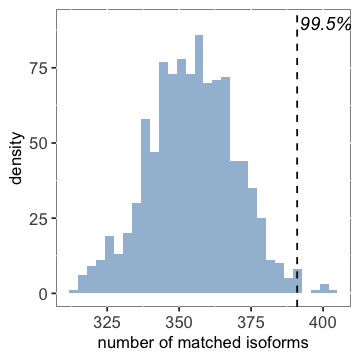

In [7]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(tmp, aes(count)) +
  geom_histogram(fill = "steelblue", alpha = .55) +
  xlab("number of matched isoforms") + 
  ylab("density") + 
  geom_vline(xintercept = tmp[tmp$perm_n == "tested",]$count, color = "black", linetype = "dashed") +
  annotate("text", label = paste0(100*tmp[tmp$perm_n == "tested",]$rank/1000,"%"), x = tmp[tmp$perm_n == "tested",]$count+10, y = 90, color = "black", fontface="italic") +
  theme(panel.background = element_rect(fill = "white", color = "grey50")) +
  theme(strip.text.x=element_text(size=10, color="black"),
        strip.text.y=element_text(size=10, color="black"),
        legend.position = "bottom",
        plot.title = element_text(size = 10),
        axis.title.x = element_text(size = 10),
        axis.title.y = element_text(size = 10),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

pdf("./FigS5b.pdf", width=3, height=5)
ggplot(tmp, aes(count)) +
  geom_histogram(fill = "steelblue", alpha = .55) +
  xlab("number of matched isoforms") + 
  ylab("density") + 
  geom_vline(xintercept = tmp[tmp$perm_n == "tested",]$count, color = "black", linetype = "dashed") +
  annotate("text", label = paste0(100*tmp[tmp$perm_n == "tested",]$rank/1000,"%"), x = tmp[tmp$perm_n == "tested",]$count+10, y = 90, color = "black", fontface="italic") +
  theme(panel.background = element_rect(fill = "white", color = "grey50")) +
  theme(strip.text.x=element_text(size=10, color="black"),
        strip.text.y=element_text(size=10, color="black"),
        legend.position = "bottom",
        plot.title = element_text(size = 10),
        axis.title.x = element_text(size = 10),
        axis.title.y = element_text(size = 10),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))
dev.off()